<a href="https://colab.research.google.com/github/bounabyazid/Parenthood/blob/master/SNA_Vauva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re

import pickle
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

!pip install spacy
import spacy
!python -m spacy download en_core_web_sm

from pprint import pprint

!pip install gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

!pip install wordcloud
from wordcloud import WordCloud

!pip install nltk
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

nltk.download('punkt')
nltk.download('stopwords')

!pip install -U textblob
import textblob
!python -m textblob.download_corpora

!pip install pyLDAvis

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nlt

In [0]:
from google.colab import files,drive
#uploaded = files.upload()

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir("/content/drive/My Drive/")

# **List of Synonyms of the word *Birth***

In [0]:
FileName = 'Dataset'

Birth = ['beginning', 'stirps', 'birth', 'start', 'blood', 'source', 'family',
         'genealogy', 'derivation', 'labor', 'parenthood', 'descent', 'parenting',
         'birthing', 'fatherhood', 'childbearing', 'parturition', 'dawn', 'background',
         'motherhood', 'generation', 'fountainhead', 'mothering', 'babyparturition',
         'extraction', 'heritage', 'reproduction', 'rise', 'delivery', 'line of descent',
         'fathering', 'genesis', 'dawning', 'the patter of tiny feet', 'creation', 
         'stock', 'childbirth', 'arrival', 'ancestry', 'origination', 'paternity',
         'line', 'maternity', 'origin', 'advent', 'breeding', 'accouchement', 'filiation',
         'nascency', 'begetting', 'confinement', 'spawning', 'nativity', 'emergence',
         'bearing', 'lineage', 'parentage', 'geniture', 'siring', 'pedigree', 'childbed', 
         'bloodline']

## **Top 10 Named Entities of the whole  Dataset** 

In [0]:
def Frequencies_NER(FileName):
    'https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-a-list'
    pickle_in = open(FileName+" NER.pkl","rb")
    NERS = pickle.load(pickle_in)
    #List_NER = [item for sublist in NERS.values() for item in sublist]
    Freq_NERs = {}
    for key in NERS.keys():
        counter = Counter(NERS[key])
        Freq_NERs[key] = counter.most_common(10)
    return Freq_NERs

def Histogram(example_list, color='r',title=''):
    word, frequency = zip(*example_list)
    indices = np.arange(len(example_list))
    plt.bar(indices, frequency, color=color)
    plt.xticks(indices, word, rotation='vertical')
    plt.tight_layout()
    plt.title("Proportion of "+title)
    plt.show()

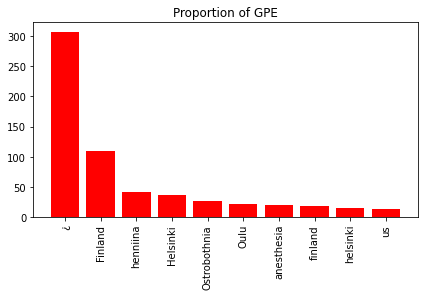

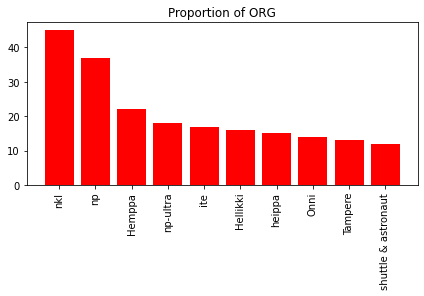

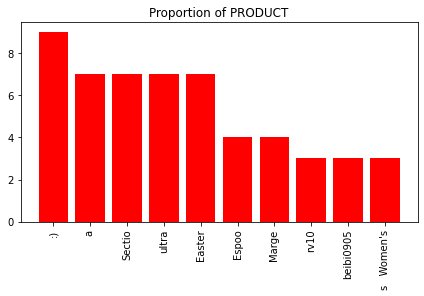

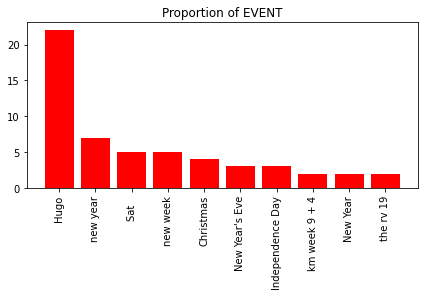

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


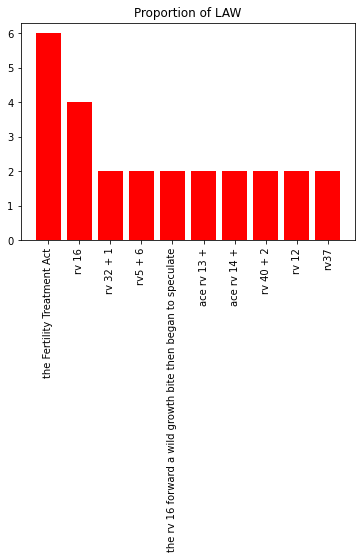

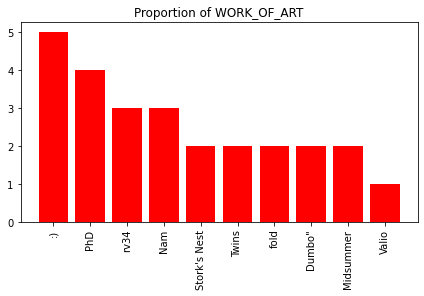

In [4]:
Freq_NERs = Frequencies_NER(FileName)
'https://stackoverflow.com/questions/45080698/make-frequency-histogram-from-list-with-tuple-elements'
#example_list = Freq_NERs['EVENT']+Freq_NERs['GPE']+Freq_NERs['LAW']+Freq_NERs['ORG']

NERS = 'EVENT, GPE, LAW, ORG, PRODUCT, WORK_OF_ART'
for key in Freq_NERs.keys():
    if key in NERS:
       #print('____________',key,'____________')
       Histogram(Freq_NERs[key], color='r',title=key)

# **Word Cloud of the most frequent words in terms of frequency**

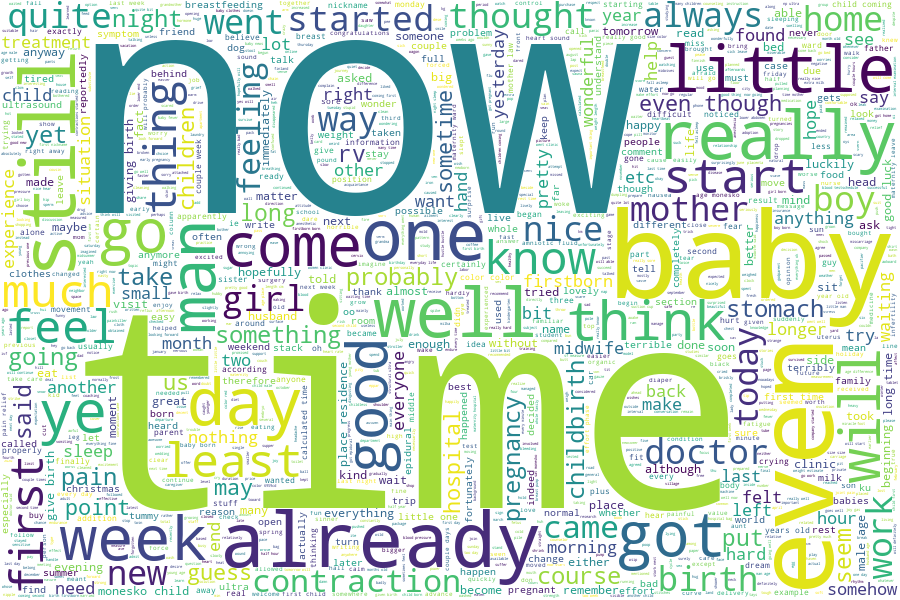

In [9]:
pickle_in = open('Dataset.pkl',"rb")
Dataset = pickle.load(pickle_in)
Texts = ' '.join(Dataset)

Texts = re.sub(r'\n+', '\n', Texts).strip()
Texts = re.sub('[,\.!?]', '', Texts)
Texts = Texts.lower()    

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=5, contour_color='steelblue',width=900, height=600)
# Generate a word cloud
wordcloud.generate(Texts)
# Visualize the word cloud
wordcloud.to_image()

##**Text preprocessing functions**

In [0]:
def Dict2List(Dataset, keys = []):
    List = []
    for Topic in Dataset:
        for key in keys:
            if isinstance(Topic[key], list):
               List.extend(Topic[key])
            else:
                List.append(Topic[key])
    return List

def Cleaning(Sentences):
    # Remove Emails
    Sentences = [re.sub('\S*@\S*\s?', '', sent) for sent in Sentences]
    # Remove new line characters
    Sentences = [re.sub('\s+', ' ', sent) for sent in Sentences]
    # Remove distracting single quotes
    Sentences = [re.sub("\'", "", sent) for sent in Sentences] 
    return Sentences
    
def sent_to_words(Sentences):
    for sentence in Sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))# deacc=True removes punctuations

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords.words('english')] for doc in texts]

def make_bigrams(texts,bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
    nlp.max_length = 21085330

    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

##**Top 10 Topics using topic Modeling (LDA)**

In [0]:
'https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/'
def LDA(Texts):
    Sentences = Cleaning(sent_tokenize(Texts))
    data_words = list(sent_to_words(Sentences))
    # Remove Stop Words
    data_words = remove_stopwords(data_words)
    
    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    #trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    #trigram_mod = gensim.models.phrases.Phraser(trigram)
    
    # Form Bigrams
    data_words_bigrams = make_bigrams(data_words,bigram_mod)

    return data_words_bigrams

def LDA2(data_words_bigrams):  
    # Do lemmatization keeping only noun, adj, vb, adv
    data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    
    # Create Dictionary
    id2word = corpora.Dictionary(data_lemmatized)

    # Create Corpus
    texts = data_lemmatized

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]
    
    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]
    
    # Compute Perplexity
    print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)
    
    return lda_model,id2word,corpus

In [0]:
data_words_bigrams = LDA(Texts)

In [14]:
lda_model,id2word,corpus = LDA2(data_words_bigrams)

[(0,
  '0.001*"go" + 0.001*"time" + 0.001*"baby" + 0.001*"come" + 0.001*"start" + '
  '0.001*"even" + 0.001*"get" + 0.001*"really" + 0.001*"already" + '
  '0.001*"would"'),
 (1,
  '0.003*"time" + 0.002*"come" + 0.002*"would" + 0.002*"go" + 0.002*"baby" + '
  '0.002*"even" + 0.002*"get" + 0.001*"first" + 0.001*"still" + '
  '0.001*"already"'),
 (2,
  '0.004*"go" + 0.004*"time" + 0.003*"baby" + 0.002*"come" + 0.002*"get" + '
  '0.002*"week" + 0.002*"feel" + 0.002*"first" + 0.002*"would" + 0.002*"even"'),
 (3,
  '0.002*"time" + 0.002*"go" + 0.001*"baby" + 0.001*"would" + 0.001*"get" + '
  '0.001*"really" + 0.001*"already" + 0.001*"come" + 0.001*"even" + '
  '0.001*"start"'),
 (4,
  '0.016*"go" + 0.015*"time" + 0.012*"baby" + 0.011*"come" + 0.011*"would" + '
  '0.010*"get" + 0.010*"even" + 0.008*"start" + 0.008*"really" + '
  '0.008*"little"'),
 (5,
  '0.003*"go" + 0.003*"time" + 0.002*"would" + 0.002*"come" + 0.002*"start" + '
  '0.002*"baby" + 0.002*"day" + 0.001*"still" + 0.001*"really"

In [15]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.244423  0.000025       1        1  99.999908
16    -0.076219 -0.000335       2        1   0.000008
15    -0.018684 -0.000518       3        1   0.000005
13    -0.029184 -0.000948       4        1   0.000005
17    -0.037732  0.001745       5        1   0.000005
3      0.038950  0.000627       6        1   0.000005
10     0.036299 -0.000453       7        1   0.000005
7      0.035058 -0.000512       8        1   0.000005
12     0.029864 -0.000147       9        1   0.000005
9      0.024811 -0.000064      10        1   0.000005
1      0.022286 -0.000352      11        1   0.000004
5      0.022118  0.001096      12        1   0.000004
19     0.013298 -0.000588      13        1   0.000004
18     0.012055  0.000067      14        1   0.000004
2      0.003607  0.000316      15        1   0.000004
0      0.082311  0.000088      16        1   0.000004
8      0.053769  0.000102      17        1   0.000004
6      0.049985 -0.000024      18        1   0.000004
14    -0.005825  0.000215      19        1   0.000004
11    -0.012345 -0.000339      20        1   0.000004, topic_info=        Term         Freq        Total Category  logprob  loglift
3943      go  5019.000000  5019.000000  Default  30.0000  30.0000
10513   time  4852.000000  4852.000000  Default  29.0000  29.0000
695     baby  3915.000000  3915.000000  Default  28.0000  28.0000
1726    come  3433.000000  3433.000000  Default  27.0000  27.0000
3894     get  3382.000000  3382.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
5833    make     0.000014  1207.026489  Topic20  -6.7594  -1.1719
11686   year     0.000013  1108.189697  Topic20  -6.7995  -1.1265
305     also     0.000015  1684.973145  Topic20  -6.6357  -1.3818
918    birth     0.000015  1700.227539  Topic20  -6.6344  -1.3894
10427  think     0.000015  1972.941162  Topic20  -6.6499  -1.5537

[1489 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
4          1  0.955507          aaaww
8          1  0.954086          aapoa
63         1  0.953630    accompanied
202        1  0.952541         aftiks
226        1  0.955352     aidillamme
...      ...       ...            ...
11650      1  1.000110          would
11665      1  0.958464          wrist
11677      1  0.952089          yaaak
11686      1  0.999829           year
11707      1  0.953503  ylatyksekseni

[429 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 17, 16, 14, 18, 4, 11, 8, 13, 10, 2, 6, 20, 19, 3, 1, 9, 7, 15, 12])

In [0]:
pickle_in = open('Dataset.pkl',"rb")
Dataset = pickle.load(pickle_in)
BirthDataset = []
for Topic in Dataset:
    for keyword in Birth:
        if keyword in (Topic['Title'] or Topic['Text']):
           BirthDataset.append(Topic)
print(len(Dataset), len(BirthDataset))

15135 885


In [0]:
pickle_in = open('Dataset Sentiments.pkl',"rb")
Sentiments = pickle.load(pickle_in)
print(Sentiments)

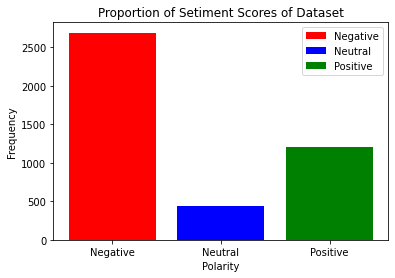

In [24]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)
ax.bar('Negative', sum(map(lambda x : int(x)<0, Sentiments)), color='r', align='center')
ax.bar('Neutral', sum(map(lambda x : int(x)==0, Sentiments)), color='b', align='center')
ax.bar('Positive', sum(map(lambda x : int(x)>0, Sentiments)), color='g', align='center')

plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title("Proportion of Setiment Scores of Dataset")
plt.legend(('Negative', 'Neutral', 'Positive'))
plt.show()

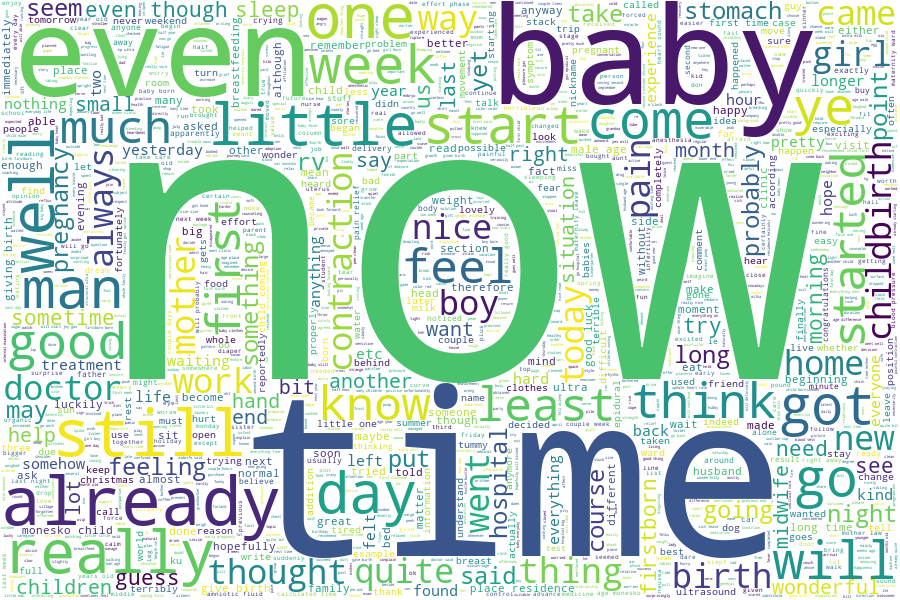

In [19]:
pickle_in = open('BirthDataset.pkl',"rb")
BirthDataset = pickle.load(pickle_in)
Texts = ' '.join(BirthDataset)

Texts = re.sub(r'\n+', '\n', Texts).strip()
Texts = re.sub('[,\.!?]', '', Texts)    
Texts = Texts.lower()    
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=5, contour_color='steelblue',width=900, height=600)
# Generate a word cloud
wordcloud.generate(Texts)
# Visualize the word cloud
wordcloud.to_image()

In [0]:
'https://freesoft.dev/program/106398438'
'https://github.com/bobvdvelde/SentiStrength_for_python/blob/master/senti_client.py'

from textblob import TextBlob
'https://www.presentslide.in/2019/08/sentiment-analysis-textblob-library.html'

def Senti_List(List, Tool = ''):
    Score = []
    for item in List:
        if Tool == 'TextBlob':
           sentiment = TextBlob(item).sentiment[0]
        #elif Tool == 'Vader':
             
        Score.append(sentiment)
    return Score

List = Dict2List(BirthDataset, keys=['Title', 'Text'])
TextBlob_Sentiments = Senti_List(List, Tool = 'TextBlob')

In [20]:
pickle_in = open('BirthDataset Sentiments.pkl',"rb")
Sentiments = pickle.load(pickle_in)
print(Sentiments)

['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '0', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '0', '-1', '-1', '-1', '-1', '1', '-1', '-1', '1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '0', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '1', '1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '1', '1', '1', '-1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '1', '1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1

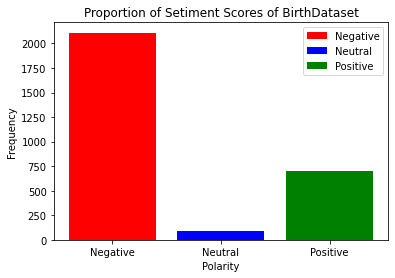

In [22]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)
ax.bar('Negative', sum(map(lambda x : int(x)<0, Sentiments)), color='r', align='center')
ax.bar('Neutral', sum(map(lambda x : int(x)==0, Sentiments)), color='b', align='center')
ax.bar('Positive', sum(map(lambda x : int(x)>0, Sentiments)), color='g', align='center')

plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title("Proportion of Setiment Scores of BirthDataset")
plt.legend(('Negative', 'Neutral', 'Positive'))
plt.show()

#**NER associated to Pos and Neg Sentiment Scores in Birth-Dataset.**

##**List of Birth Sentences from Birth-Dataset**



In [0]:
def NER_Birth():
    Pos_BirthDataset_NER = {}
    Neg_BirthDataset_NER = {}
    nlp =spacy.load('en_core_web_sm')
    Sentences = BirthDataset
    Birth_Pos_Sentences = []
    Birth_Neg_Sentences = []

    for i in range(0, len(Sentences)):  
        doc = nlp(Sentences[i])
        if int(Sentiments[i]) > 0:
           Birth_Pos_Sentences.append(Sentences[i])
           for ent in doc.ents:
               if not ent.label_ in Pos_BirthDataset_NER.keys():
                  Pos_BirthDataset_NER[ent.label_] = [ent.text]
               else:
                   Pos_BirthDataset_NER[ent.label_].append(ent.text)
        if int(Sentiments[i]) < 0:
           Birth_Neg_Sentences.append(Sentences[i])
           for ent in doc.ents:
               if not ent.label_ in Neg_BirthDataset_NER.keys():
                  Neg_BirthDataset_NER[ent.label_] = [ent.text]
               else:
                    Neg_BirthDataset_NER[ent.label_].append(ent.text)

    pickle_out = open("Pos BirthDataset NER.pkl","wb")
    pickle.dump(Pos_BirthDataset_NER, pickle_out)
    pickle_out.close()

    pickle_out = open("Neg BirthDataset NER.pkl","wb")
    pickle.dump(Neg_BirthDataset_NER, pickle_out)
    pickle_out.close()
    return Pos_BirthDataset_NER, Neg_BirthDataset_NER, Birth_Pos_Sentences, Birth_Neg_Sentences


In [0]:
Pos_BirthDataset_NER, Neg_BirthDataset_NER, Birth_Pos_Sentences, Birth_Neg_Sentences = NER_Birth()

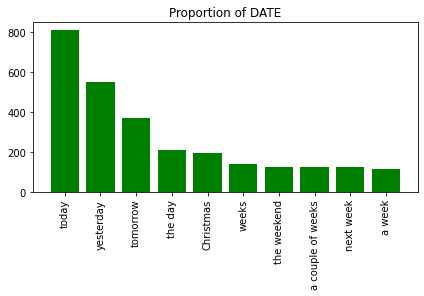

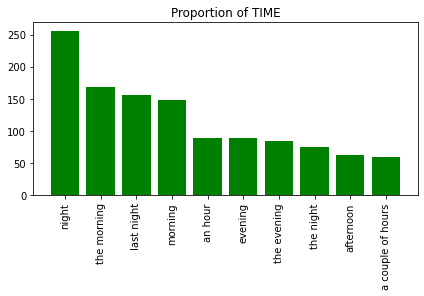

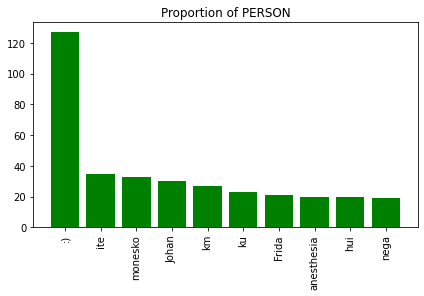

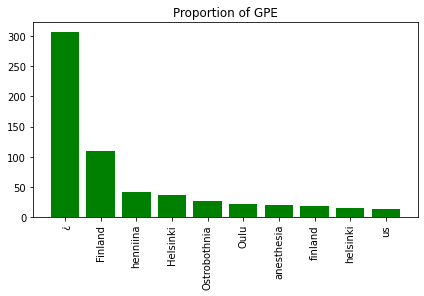

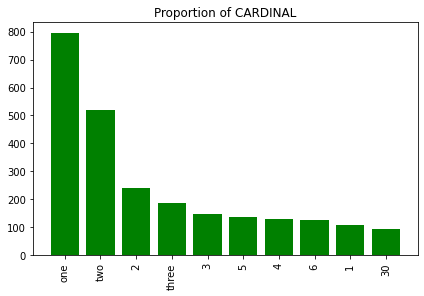

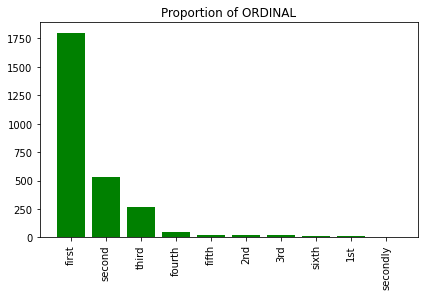

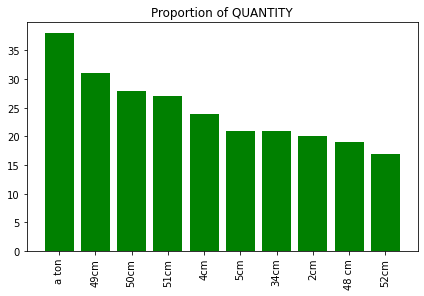

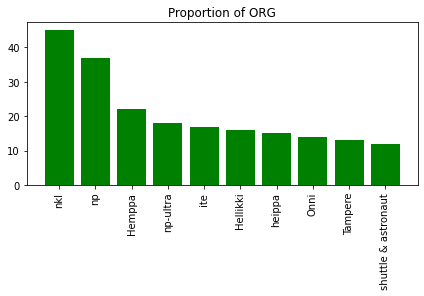

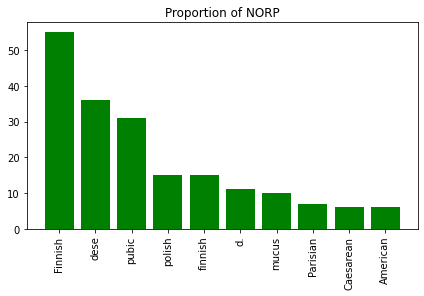

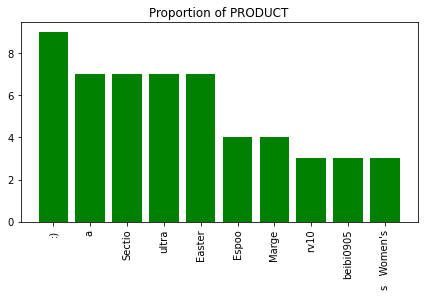

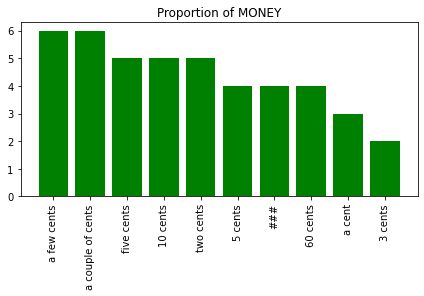

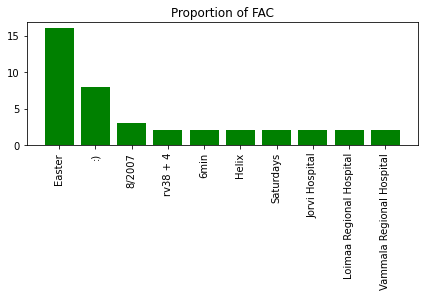

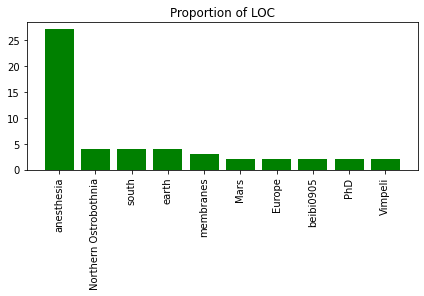

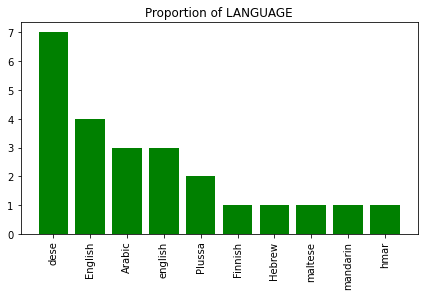

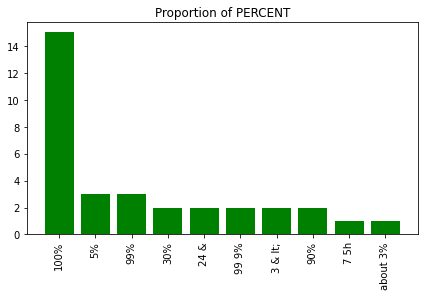

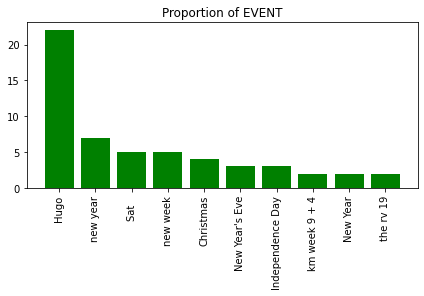

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


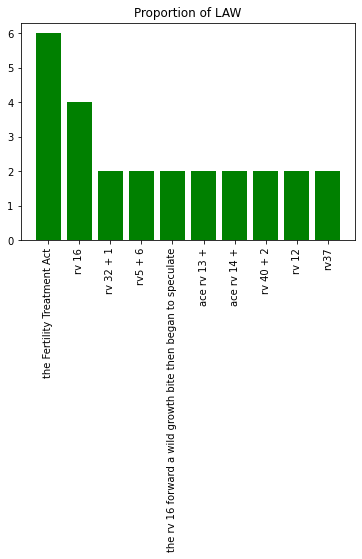

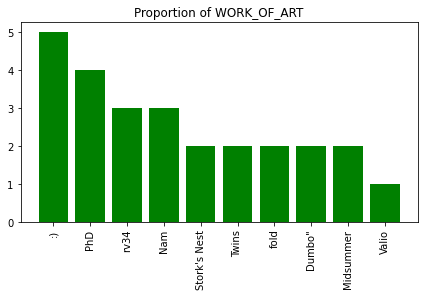

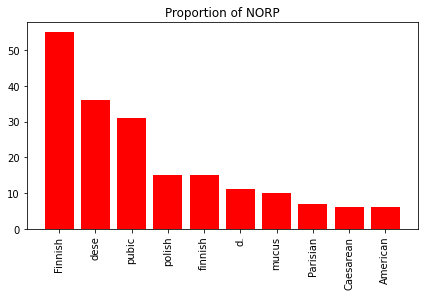

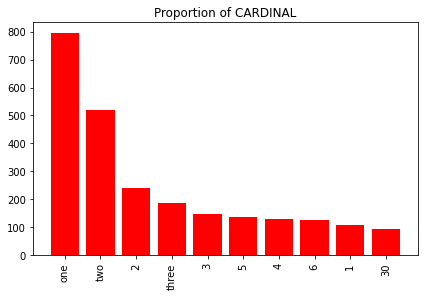

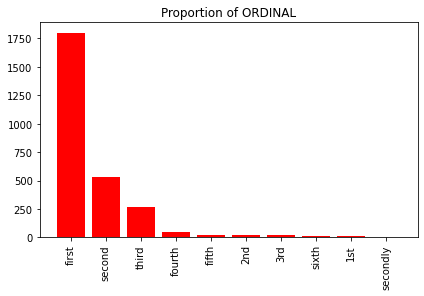

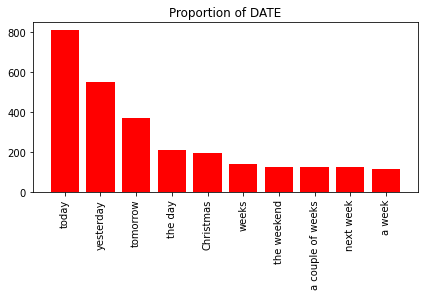

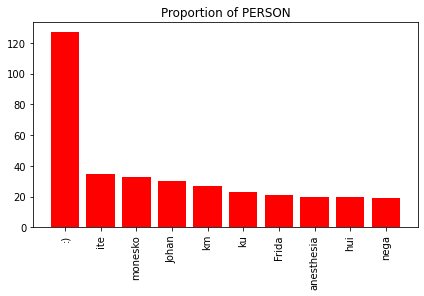

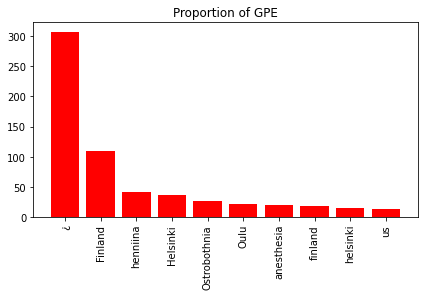

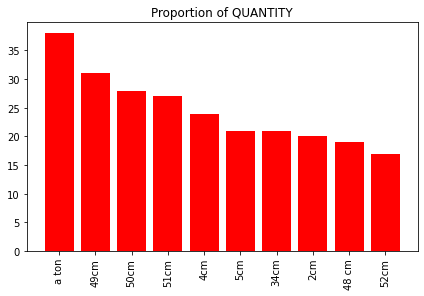

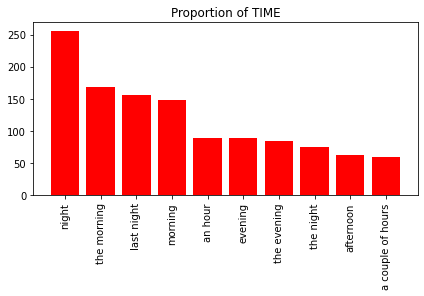

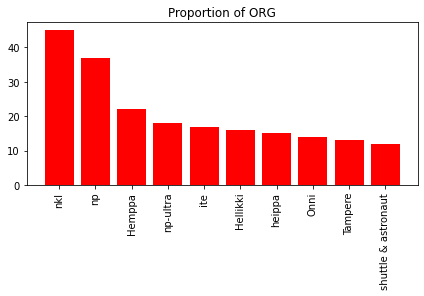

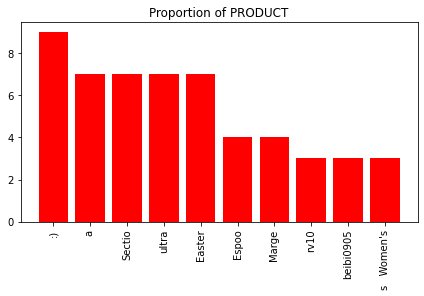

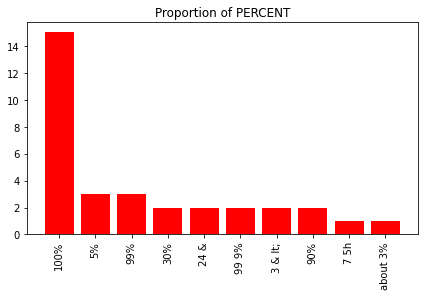

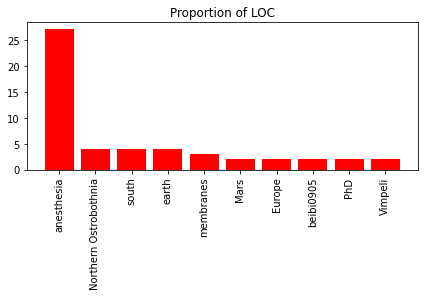

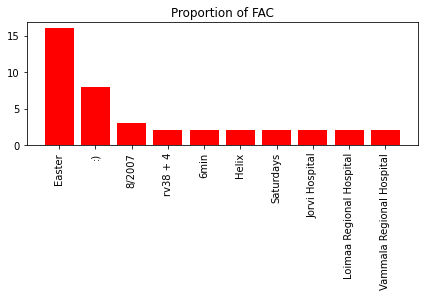

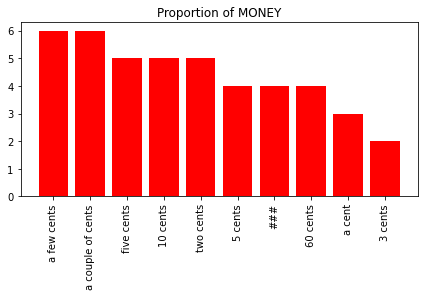

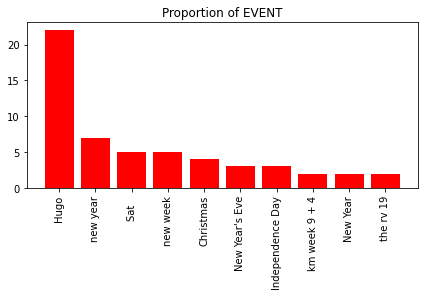

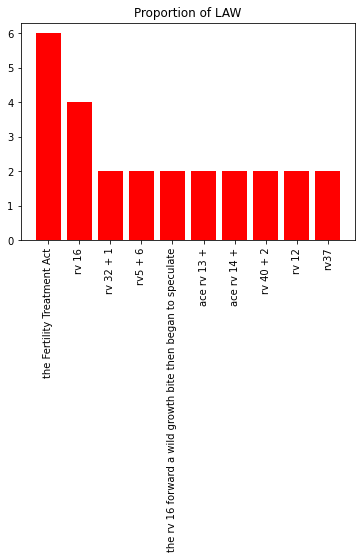

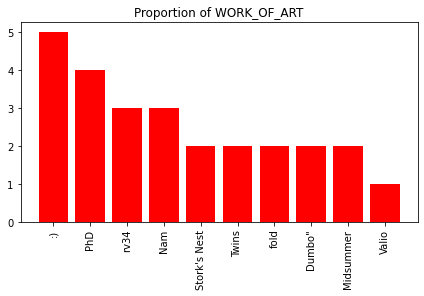

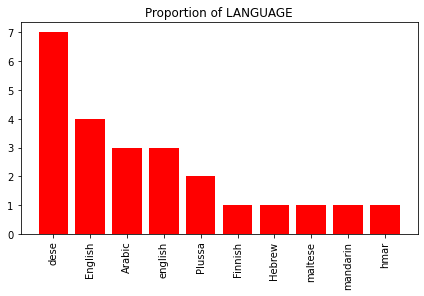

In [27]:
Pos_Freq_NERs = Frequencies_NER('Pos BirthDataset')
Neg_Freq_NERs = Frequencies_NER('Neg BirthDataset')

NERS = 'EVENT, GPE, LAW, ORG, PRODUCT, WORK_OF_ART'

for key in Pos_Freq_NERs.keys():
    #if key in NERS:
    #print('____________',key,'____________')
    Histogram(Freq_NERs[key], color='g',title=key)

for key in Neg_Freq_NERs.keys():
    #if key in NERS:
    #print('____________',key,'____________')
    Histogram(Freq_NERs[key], color='r',title=key)

#**LDA of Birth Positive Sentences and Negative Sentences**

In [28]:
Pos_Texts = '\n'.join(sentence for sentence in Birth_Pos_Sentences)
Neg_Texts = '\n'.join(sentence for sentence in Birth_Neg_Sentences)

Pos_words_bigrams = LDA(Pos_Texts)
Neg_words_bigrams = LDA(Neg_Texts)

lda_Pos,id2word_Pos,Pos_corpus = LDA2(Pos_words_bigrams)
lda_Neg,id2word_Neg,Neg_corpus = LDA2(Neg_words_bigrams)

[(0,
  '0.206*"time" + 0.138*"start" + 0.099*"day" + 0.038*"next" + 0.027*"guess" + '
  '0.027*"however" + 0.027*"hour" + 0.026*"rest" + 0.025*"can" + 0.024*"hope"'),
 (1,
  '0.091*"say" + 0.072*"doctor" + 0.066*"last" + 0.060*"long" + '
  '0.057*"treatment" + 0.048*"home" + 0.043*"new" + 0.030*"yet" + '
  '0.022*"minute" + 0.019*"yesterday"'),
 (2,
  '0.210*"baby" + 0.187*"already" + 0.025*"old" + 0.024*"lie" + '
  '0.022*"completely" + 0.016*"lose" + 0.015*"fit" + 0.015*"apparently" + '
  '0.014*"anymore" + 0.013*"heart"'),
 (3,
  '0.086*"try" + 0.074*"contraction" + 0.031*"symptom" + 0.024*"thought" + '
  '0.022*"clothe" + 0.022*"cry" + 0.020*"result" + 0.019*"pack" + '
  '0.019*"future" + 0.018*"stop"'),
 (4,
  '0.093*"thing" + 0.074*"wait" + 0.054*"many" + 0.053*"see" + 0.049*"news" + '
  '0.033*"hand" + 0.027*"thank" + 0.022*"have" + 0.022*"midwife" + '
  '0.020*"body"'),
 (5,
  '0.161*"still" + 0.059*"pain" + 0.058*"quite" + 0.053*"sometimes" + '
  '0.041*"want" + 0.033*"worry" 

In [29]:
#pyLDAvis.enable_notebook()
Pos_vis = pyLDAvis.gensim.prepare(lda_Pos,Pos_corpus,id2word_Pos)
Pos_vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.424020  0.096330       1        1  7.265389
14     0.046468 -0.361448       2        1  6.723247
12     0.039819 -0.200773       3        1  6.402151
9      0.004676  0.000017       4        1  5.781924
7     -0.025940  0.026963       5        1  5.498547
1     -0.002767  0.004539       6        1  5.371564
15    -0.026991  0.025136       7        1  5.155261
13    -0.032397  0.032391       8        1  4.913588
10    -0.030528  0.026574       9        1  4.892866
2     -0.026171  0.025091      10        1  4.869682
16    -0.028470  0.026155      11        1  4.860424
3     -0.037214  0.033186      12        1  4.559232
11    -0.034006  0.030177      13        1  4.463472
8     -0.029709  0.030871      14        1  4.458950
5     -0.035186  0.032705      15        1  4.290580
4     -0.041380  0.033215      16        1  4.232956
17    -0.040091  0.033960      17        1  4.215095
18    -0.039410  0.034054      18        1  4.213909
19    -0.039923  0.036497      19        1  4.018979
6     -0.044799  0.034361      20        1  3.812195, topic_info=          Term         Freq        Total Category  logprob  loglift
27        time  1243.000000  1243.000000  Default  30.0000  30.0000
22          go  1077.000000  1077.000000  Default  29.0000  29.0000
107       baby   850.000000   850.000000  Default  28.0000  28.0000
100       come   819.000000   819.000000  Default  27.0000  27.0000
161       week   747.000000   747.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
2878   hearing    23.888973    24.830631  Topic20  -4.8860   3.2283
2849  neighbor    22.721704    23.663363  Topic20  -4.9361   3.2264
762     method    22.134914    23.076572  Topic20  -4.9623   3.2253
2016     stone    18.410219    19.351877  Topic20  -5.1466   3.2171
2335   message    17.705217    18.646875  Topic20  -5.1856   3.2151

[631 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
248      18  0.991106       able
525       8  0.981087     accord
1430     19  0.970921       acid
56       18  0.980322   actually
653       9  0.981571   addition
...     ...       ...        ...
406      20  0.982140      wrong
403       8  0.985008       yard
282       4  0.996502       year
1102      6  0.984856  yesterday
201       6  0.996584        yet

[601 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 15, 13, 10, 8, 2, 16, 14, 11, 3, 17, 4, 12, 9, 6, 5, 18, 19, 20, 7])

In [30]:
Neg_vis = pyLDAvis.gensim.prepare(lda_Neg,Neg_corpus,id2word_Neg)
Neg_vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
8     -0.447727 -0.018525       1        1  8.277592
7      0.003710  0.415647       2        1  5.888487
12     0.008418  0.045363       3        1  5.580728
9      0.015892 -0.056165       4        1  5.556966
11     0.017090 -0.036001       5        1  5.515853
15     0.022671 -0.030615       6        1  5.452707
0      0.010324  0.020007       7        1  5.334887
2      0.012847 -0.089224       8        1  5.196828
10     0.029832 -0.013020       9        1  4.976527
6      0.018558 -0.024356      10        1  4.726755
19     0.031978 -0.005356      11        1  4.620327
1      0.028906 -0.014978      12        1  4.591860
18     0.018163 -0.052163      13        1  4.503023
14     0.030107 -0.007240      14        1  4.496855
13     0.029778 -0.023291      15        1  4.402754
16     0.027952 -0.015947      16        1  4.396563
5      0.033403 -0.020585      17        1  4.333739
3      0.037132 -0.021224      18        1  4.115077
17     0.033176 -0.027275      19        1  4.053471
4      0.037791 -0.025052      20        1  3.979007, topic_info=            Term         Freq        Total Category  logprob  loglift
73            go  2382.000000  2382.000000  Default  30.0000  30.0000
25          time  2339.000000  2339.000000  Default  29.0000  29.0000
14         would  1760.000000  1760.000000  Default  28.0000  28.0000
108      already  1501.000000  1501.000000  Default  27.0000  27.0000
57         start  1807.000000  1807.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1412      belong    59.411644    60.398239  Topic20  -4.7110   3.2077
1145  individual    53.564659    54.551254  Topic20  -4.8146   3.2059
93         occur    53.336380    54.322975  Topic20  -4.8189   3.2058
1390        book    52.174038    53.160633  Topic20  -4.8409   3.2054
1940       quiet    48.935135    49.921730  Topic20  -4.9050   3.2042

[631 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
335       1  0.998174       able
1775      5  0.995077     accord
1708      6  0.993361       acid
862      10  0.995844   actually
395       3  0.990475   addition
...     ...       ...        ...
325       5  0.995859      write
1115     11  0.993354      wrong
156      11  0.998438       year
1791     16  0.997650  yesterday
105       3  0.996449        yet

[608 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 8, 13, 10, 12, 16, 1, 3, 11, 7, 20, 2, 19, 15, 14, 17, 6, 4, 18, 5])

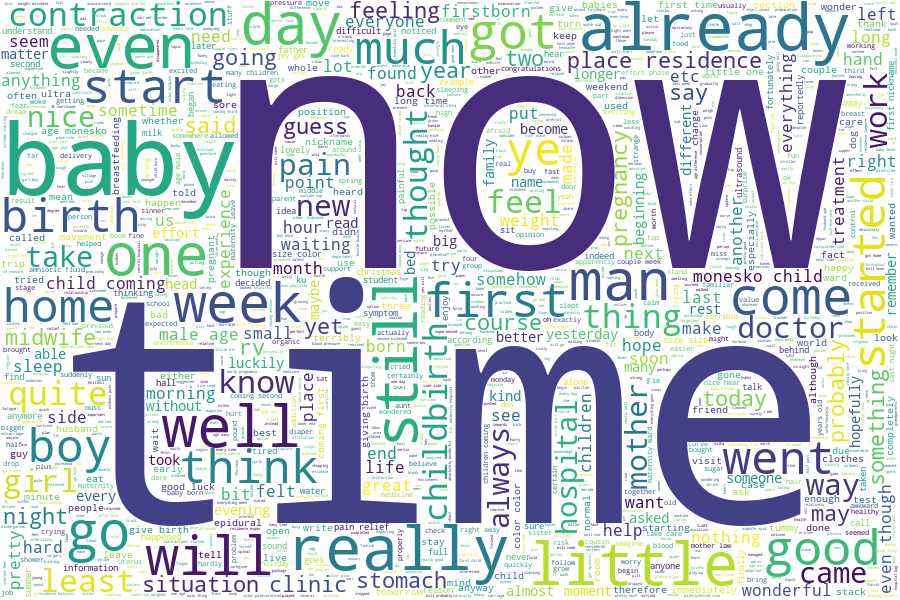

In [31]:
Texts = Pos_Texts

Texts = re.sub('[,\.!?]', '', Texts)    
Texts = Texts.lower()    
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=5, contour_color='steelblue',width=900, height=600)
# Generate a word cloud
wordcloud.generate(Texts)
# Visualize the word cloud
wordcloud.to_image()


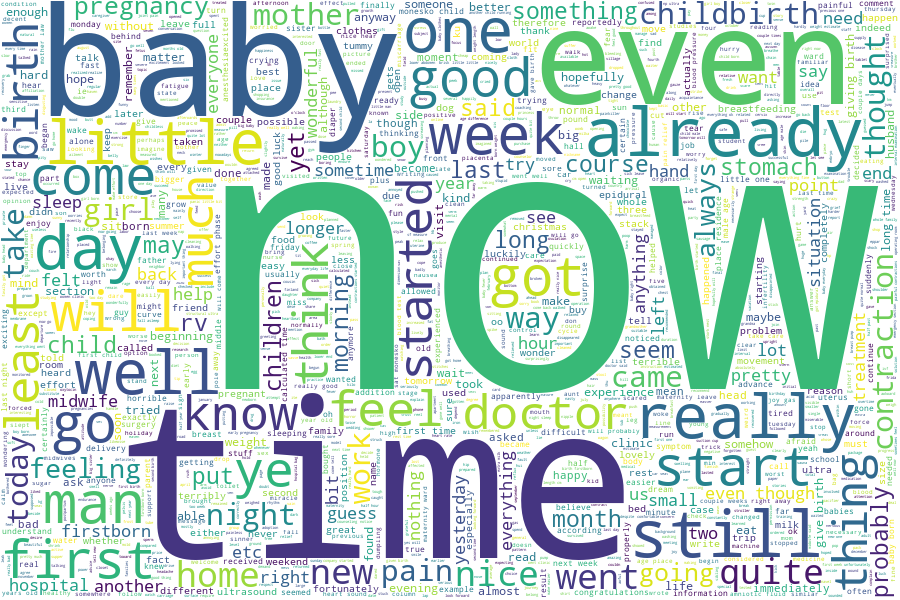

In [32]:
Texts = Neg_Texts

Texts = re.sub('[,\.!?]', '', Texts)    
Texts = Texts.lower()    
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=5, contour_color='steelblue',width=900, height=600)
# Generate a word cloud
wordcloud.generate(Texts)
# Visualize the word cloud
wordcloud.to_image()

In [0]:
import spacy
from spacy import displacy
from pathlib import Path

nlp = spacy.load("en_core_web_sm")
doc = nlp("there have bad service a lot in this hospital.")
image = displacy.render(doc, options={'distance':80},style="dep")#jupyter=True,

output_path = Path("dependency_plot.svg")
output_path.open("w", encoding="utf-8").write(image)


7161

The negative attribute **"bad"** will be associated to **"service"** as the closed noun that links **"bad"** in parser-tree